## Installing new libraries

In [120]:
! pip install seaborn==0.11.1
! pip install plotly==4.14.3

## Import Libraries

In [133]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

__Example 11.4.2__ (Iris Flower Data by Fisher, R. A. (1936) and Anderson, E. (1935)) Use the popular
Iris flower data set to exhibit various visualisation techniques using R software. __Table 11.4.3__ shows the
first few observations of the data set, but the complete data set is available on the website:
www.wiley.com/college/gupta/statistics2e. The ‘Species’ is a categorical variable with three classes
(Setosa, Versicolor, and Virginica) and ‘Sepal Length’, ‘Sepal Width’, ‘Petal.Length’, and ‘Petal Width’
describe numerical measurements of the flowers.

### Loading the Iris dataset into a pandas dataframe 

In [77]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [70]:
# Visualise Observations 7–10
iris_df[6:10]  # note that indexing begins from 0 (not 1) and the ending index (11) is non-inclusive

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [71]:
# summary of the entire dataset 
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
# Quantiles of the first variable in the data frame
iris_df.describe()['sepal_length']

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

The following Python code can be used to obtain basic graphical displays such as histogram, boxplot, and
scatter plots. As shown in Figure 11.1(d), the scatter plot with groups help us not only to understand
the trend between sepal width vs sepal length, but also allows to see different trends for each flower type
with some clustering structures.

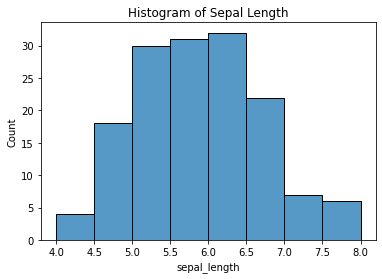

In [73]:
# Histogram of Sepal Length
sns.histplot(data=iris_df['sepal_length'], bins=np.arange(4, 8.5, 0.5))  # you can customize the bins however you like!
plt.title('Histogram of Sepal Length')
plt.show()

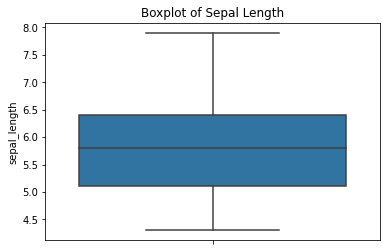

In [74]:
# Boxplot of Sepal Length
sns.boxplot(y=iris_df['sepal_length'])
plt.title('Boxplot of Sepal Length')
plt.show()

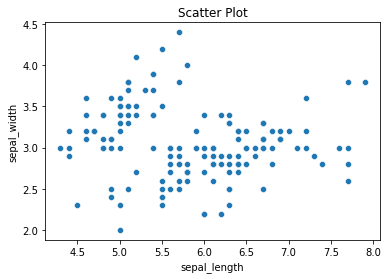

In [75]:
# Bivariate scatter plot of Sepal Length vs Sepal Width
sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'])
plt.title('Scatter Plot')
plt.show()

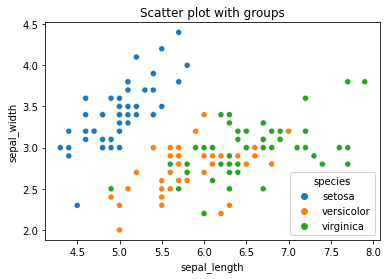

In [79]:
sns.scatterplot(data=iris_df, x="sepal_length", y="sepal_width", hue="species")
plt.title('Scatter plot with groups')
plt.show()

### Scatter plot for Iris variables “Sepal Width”, “Sepal Length”, and “Petal Length”.

In [94]:
fig = px.scatter_3d(iris_df, x='sepal_width', y='sepal_length', z='petal_width',
                    color='species', symbol='species')
fig.show()

In [95]:
fig = px.box(iris_df, x="species", y="petal_length", boxmode='group')
fig.show()

In [97]:
fig = px.scatter(iris_df, x="sepal_length", y="sepal_width", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

__Example 11.7.2__ (Iris Flower Data) We reconsider the Iris flower data we discussed in Example 11.4.2. First we use these Iris data to build (or train) a classification tree using 80% of its data and validate the fitted tree using the rest of 20% of data. We use the first 116 observations to train the model. The ‘Species’ is the response variable with three classes (Setosa, Versicolor, and Virginica) and Sepal Length, Sepal Width, Petal.Length, and Petal Width are the predictors.

In [147]:
X, y = iris_df.iloc[:,:-1], iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

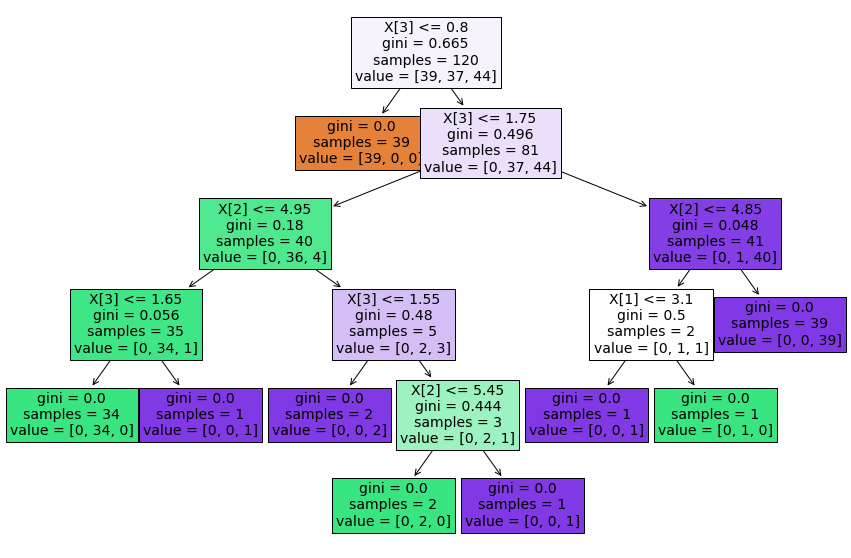

In [148]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, fontsize=14) 
plt.show()

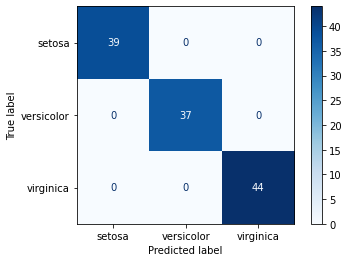

In [149]:
plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=['setosa', 'versicolor', 'virginica'],
                                 cmap=plt.cm.Blues)

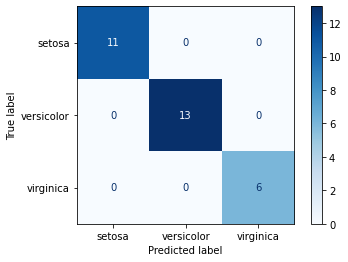

In [150]:
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['setosa', 'versicolor', 'virginica'],
                                 cmap=plt.cm.Blues)